<img src="./img/logo.png" align="right" width="50%"></img>
# iAtlantic GeoNode Workshop
### Tier 2: How to use OGC webservices offered by the iAtlantic GeoNode in your data analysis

## 3. Subset & download data using OGC Web Feature and Coverage Services (WFS/WCS)

The OWSLib library is a python library that makes accessing data and metadata through OGC services possible. The library abstracts all of the traditional HTTP API calls into programmatic function calls. We will be using this library throughout the tutorial to interact with the iAtlantic GeoNode OGC services.

The library is available from GitHub @  https://github.com/geopython/OWSLib

In [1]:
from owslib.wfs import WebFeatureService
from owslib.wcs import WebCoverageService
from matplotlib import pyplot as plt


### 3.1 Get vector data with WFS

#### Create a WebFeatureService (WFS) object
Note that we use version 1.1.0 as in OWSLib this version has support for [OGC Filter Encoding](https://www.ogc.org/standards/filter)

In [2]:
wfs = WebFeatureService('https://www.geonode.iatlantic.eu/geoserver/ows', version = '1.1.0')

#### Find out what the WFS has to offer. Service metadata:

In [3]:
print(wfs.identification.type)
print(wfs.identification.version)
print(wfs.identification.title)
print(wfs.identification.abstract)

WFS
1.1.0
iAtlantic WFS
This WFS service offers vector data collected within the within the framework of the iAtlantic project.


#### See available methods

In [4]:
[operation.name for operation in wfs.operations]

['GetCapabilities',
 'DescribeFeatureType',
 'GetFeature',
 'GetGmlObject',
 'LockFeature',
 'GetFeatureWithLock',
 'Transaction']

#### Get available formats

In [5]:
wfs.getOperationByName('GetFeature').parameters

{'resultType': {'values': ['results', 'hits']},
 'outputFormat': {'values': ['text/xml; subtype=gml/3.1.1',
   'GML2',
   'KML',
   'SHAPE-ZIP',
   'application/gml+xml; version=3.2',
   'application/json',
   'application/vnd.google-earth.kml xml',
   'application/vnd.google-earth.kml+xml',
   'csv',
   'excel',
   'excel2007',
   'gml3',
   'gml32',
   'json',
   'text/xml; subtype=gml/2.1.2',
   'text/xml; subtype=gml/3.2']}}

#### Find out what vector datasets (FeatureTypes) are available
Note that only vector datasets that are uploaded to the GeoNode and are publicly available are shown

In [6]:
list(wfs.contents)

['geonode:a__01_2020_12_313',
 'geonode:a__11_2020_12_311',
 'geonode:a__12_2020_12_311',
 'geonode:a__02_2020_12_311',
 'geonode:a__03_2020_12_311',
 'geonode:a__04_2020_12_311',
 'geonode:a__05_2021_04_141',
 'geonode:a__06_2020_12_311',
 'geonode:a__07_2020_12_311',
 'geonode:a__08_2020_12_314',
 'geonode:a__09_2020_12_311',
 'geonode:AquaMaps_Species_Richness',
 'geonode:AquaMaps_Species_Richness_Cetaceans',
 'geonode:AquaMaps_Species_Richness_Elasmobranchs0',
 'geonode:Basins',
 'geonode:iAtlantic_StudyArea01_Shapes_MFRI_exp',
 'geonode:iAtlantic_StudyArea01_Shapes_Merian',
 'geonode:iAtlantic_StudyArea01_Shapes_Meteor',
 'geonode:iAtlantic_StudyArea02_Shapes',
 'geonode:iAtlantic_StudyArea03_Shapes',
 'geonode:iAtlantic_StudyArea03_Shapes_External',
 'geonode:iAtlantic_StudyArea04_Shapes',
 'geonode:iAtlantic_StudyArea05_Shapes',
 'geonode:iAtlantic_StudyArea06_Shapes_Merian',
 'geonode:iAtlantic_StudyArea06_Shapes_Meteor',
 'geonode:iAtlantic_StudyArea07_Shapes',
 'geonode:iAtla

In [7]:
dataset = 'geonode:Submarine_Canyon'

#### Get the FeatureType metadata:

In [8]:
print(wfs.contents[dataset].title)
print(wfs.contents[dataset].abstract)

Submarine Canyon
The aim of this study is to assess the global occurrence of large submarine canyons to provide context and guidance for discussions regarding canyon occurrence, distribution, geological and oceanographic significance and conservation. Based on an analysis of the ETOPO1 data set, this study has compiled the first inventory of 5849 separate large submarine canyons in the world ocean. Active continental margins contain 15% more canyons (2586, equal to 44.2% of all canyons) than passive margins (2244, equal to 38.4%) and the canyons are steeper, shorter, more dendritic and more closely spaced on active than on passive continental margins. This study confirms observations of earlier workers that a relationship exists between canyon slope and canyon spacing (increased canyon slope correlates with closer canyon spacing). The greatest canyon spacing occurs in the Arctic and the Antarctic whereas canyons are more closely spaced in the Mediterranean than in other areas. River-as

#### Get the FeatureType’s schema via `DescribeFeatureType`.
The dictionary returned is compatible with a [Fiona schema object](https://fiona.readthedocs.io/en/latest/fiona.html#fiona.collection.Collection.schema).

In [9]:
wfs.get_schema(dataset)

{'properties': {'fid': 'int',
  'LineSegs': 'long',
  'dend2_max': 'long',
  'low_height': 'long',
  'status': 'string',
  'can_per_km': 'double',
  'MarginType': 'string',
  'CanyonName': 'string',
  'Dist_bet_p': 'double',
  'dens_LWM': 'double',
  'sinuosity': 'double',
  'Group': 'string',
  'height_dif': 'double',
  'X': 'double',
  'class': 'long',
  'dend2_min': 'long',
  'slope_LWM': 'double',
  'sed_LWM': 'double',
  'Y': 'double',
  'dens_MAX': 'double',
  'slope_max': 'double',
  'sed_max': 'double',
  'hemisphere': 'string',
  'dens_MIN': 'double',
  'dend2_LWM': 'double',
  'Slope_min': 'double',
  'DENDper_ht': 'double',
  'sed_min': 'double',
  'Length_km': 'double',
  'DENDperkm2': 'double',
  'gt1500m': 'string',
  'top_height': 'long'},
 'required': ['fid'],
 'geometry': 'MultiLineString',
 'geometry_column': 'the_geom'}

#### Subset data with a bounding box

In [10]:
# subset data with a bounding box
response = wfs.getfeature(typename=dataset,
                          bbox=(-69,-60,20,0), #subset to the south Atlantic
                          outputFormat='application/json')
# write it to a GeoJson file
with open(f'data/{dataset.replace(":","_")}.json', 'wb') as outfile:
    outfile.write(response.read())
response.close()
# read the GeoJson file using GeoPandas
import geopandas as gpd
gdf = gpd.read_file(f'data/{dataset.replace(":","_")}.json')
gdf

,id,fid,LineSegs,dend2_max,low_height,status,can_per_km,MarginType,CanyonName,Dist_bet_p,...,dens_MIN,dend2_LWM,Slope_min,DENDper_ht,sed_min,Length_km,DENDperkm2,gt1500m,top_height,geometry
0,Submarine_Canyon.1,1,8,0,-1852,a,76.2651,Passive,,103.5910,...,1,0.00000,0.197904,0.000000,-99999,99.602268,0.000000,part,-14,"MULTILINESTRING ((10.79856 -5.76364, 11.04801 ..."
1,Submarine_Canyon.255,255,29,3,-3687,a,53.5035,Passive,,38.8417,...,3,3.00000,0.051794,2.777780,3257,130.504595,0.000028,part,-5,"MULTILINESTRING ((-36.84008 -10.75541, -36.816..."
2,Submarine_Canyon.330,330,33,9,-3299,a,21.4959,Active,,42.0659,...,7,9.00000,0.049438,8.333330,923,74.606626,0.000083,part,-102,"MULTILINESTRING ((-65.36658 -55.61658, -65.400..."
3,Submarine_Canyon.331,331,8,9,-2131,b,-99999.0000,Active,,-99999.0000,...,-99999,9.00000,0.024416,8.333330,1112,39.951121,0.000083,part,-80,"MULTILINESTRING ((-66.33333 -55.36667, -66.283..."
4,Submarine_Canyon.333,333,14,9,-2293,b,-99999.0000,Active,,-99999.0000,...,-99999,9.00000,0.083157,8.333330,1120,57.841448,0.000083,part,-64,"MULTILINESTRING ((-66.29999 -55.21667, -66.283..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,Submarine_Canyon.8615,8615,5,1,-1981,a,21.8489,Passive,,15.7037,...,9,1.00000,0.810686,0.925926,5077,36.352984,0.000009,part,-867,"MULTILINESTRING ((8.68991 -2.99353, 8.74954 -2..."
368,Submarine_Canyon.8616,8616,5,1,-3997,a,22.2222,Passive,,36.4317,...,9,1.00000,0.745183,0.925926,4222,29.747356,0.000009,none,-2899,"MULTILINESTRING ((8.17690 -3.15182, 8.26108 -3..."
369,Submarine_Canyon.8626,8626,7,2,-3839,a,23.6452,Passive,,12.9005,...,6,1.74563,0.609348,1.616320,5141,68.948230,0.000016,none,-1853,"MULTILINESTRING ((8.82145 -3.95160, 8.81619 -3..."
370,Submarine_Canyon.8627,8627,6,1,-3344,a,23.5451,Passive,,12.9005,...,6,1.00000,0.475002,0.925926,5668,55.230857,0.000009,none,-1561,"MULTILINESTRING ((8.97930 -3.88320, 9.05297 -3..."


(-60.0, 0.0)

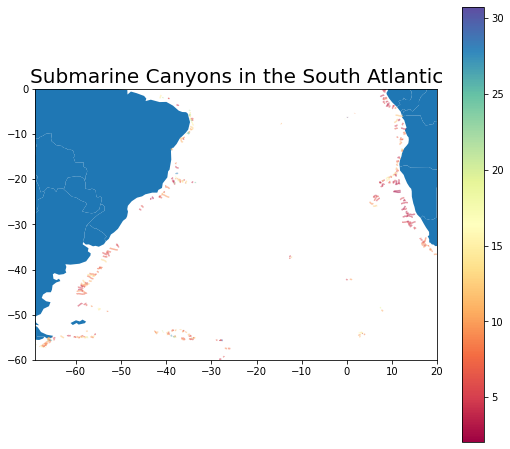

In [11]:
# get shapefile of world outline
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(1, figsize=(9,8))
world.plot(ax=ax) # add world base layer
gdf.plot(column='slope_max',
         categorical=False,
         cmap='Spectral',
         legend= True,
         alpha = 0.5,
         ax=ax) # add study areas colord by study region number
ax.set_title('Submarine Canyons in the South Atlantic',fontsize=20)
ax.set_xlim(-69,20)
ax.set_ylim(-60,0)

#### Subset data by attributes using [OGC Filter Encoding](https://www.ogc.org/standards/filter)

In [12]:
import owslib.fes as fes #Filter encodin standard
from owslib.etree import etree
# build a filter
sa_filter = fes.PropertyIsEqualTo(propertyname='MarginType', literal='Passive') # Passive Margin Canyons
fid_filter = fes.PropertyIsBetween(propertyname='top_height', lower = -5000, upper= -1000) # filter to fid between 0 and 4
filter = fes.And([sa_filter,fid_filter]) # combine using And
# get an xml representation of the filter
filterxml = etree.tostring(filter.toXML()).decode("utf-8")
# pass it to getFeature
response = wfs.getfeature(typename=dataset,
                        outputFormat='application/json',
                        filter=filterxml)
# write it to a GeoJson file
with open(f'data/{dataset.replace(":","_")}_filtered.json', 'wb') as outfile:
    outfile.write(response.read())
response.close()
# read the GeoJson file using GeoPandas
gdf = gpd.read_file(f'data/{dataset.replace(":","_")}_filtered.json')
gdf

,id,fid,LineSegs,dend2_max,low_height,status,can_per_km,MarginType,CanyonName,Dist_bet_p,...,dens_MIN,dend2_LWM,Slope_min,DENDper_ht,sed_min,Length_km,DENDperkm2,gt1500m,top_height,geometry
0,Submarine_Canyon.8,8,27,42,-3462,b,-99999.0000,Passive,,-99999.000,...,-99999,40.8272,0.397456,37.803000,7221,100.032451,0.000378,part,-1111,"MULTILINESTRING ((-56.53333 43.73333, -56.5333..."
1,Submarine_Canyon.9,9,5,41,-3328,b,-99999.0000,Passive,,-99999.000,...,-99999,39.4187,1.033030,36.498800,7221,13.644248,0.000365,none,-2990,"MULTILINESTRING ((-56.50000 43.81667, -56.4833..."
2,Submarine_Canyon.10,10,7,40,-3268,b,-99999.0000,Passive,,-99999.000,...,-99999,38.6947,0.379031,35.828400,8435,26.850513,0.000358,none,-2631,"MULTILINESTRING ((-56.76667 44.06667, -56.7666..."
3,Submarine_Canyon.11,11,7,42,-2840,d,-99999.0000,Passive,,-99999.000,...,-99999,41.0296,0.259428,37.990400,9228,24.724500,0.000380,none,-2126,"MULTILINESTRING ((-56.73333 44.26667, -56.7333..."
4,Submarine_Canyon.12,12,26,42,-3338,c,-99999.0000,Passive,,-99999.000,...,-99999,41.2419,0.302695,38.186900,7838,74.818271,0.000382,part,-1461,"MULTILINESTRING ((-56.60000 44.50000, -56.6000..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,Submarine_Canyon.8628,8628,5,4,-3333,b,-99999.0000,Passive,,-99999.000,...,-99999,4.0000,0.183752,3.703700,893,55.117789,0.000037,none,-2349,"MULTILINESTRING ((-75.66320 -67.71309, -75.579..."
1433,Submarine_Canyon.8629,8629,3,3,-2796,c,-99999.0000,Passive,,-99999.000,...,-99999,3.0000,2.116820,2.777780,-99999,18.927188,0.000028,none,-1888,"MULTILINESTRING ((-174.53949 -72.33557, -174.5..."
1434,Submarine_Canyon.8630,8630,4,1,-4003,a,24.5177,Passive,,35.631,...,8,1.0000,0.038605,0.925926,3955,44.271296,0.000009,none,-2809,"MULTILINESTRING ((8.04936 -3.00831, 8.13139 -2..."
1435,Submarine_Canyon.8631,8631,7,4,-2880,b,-99999.0000,Passive,,-99999.000,...,-99999,4.0000,2.543960,3.703700,-99999,25.181166,0.000037,part,-1105,"MULTILINESTRING ((-24.36959 -73.67328, -24.323..."


(-60.0, 0.0)

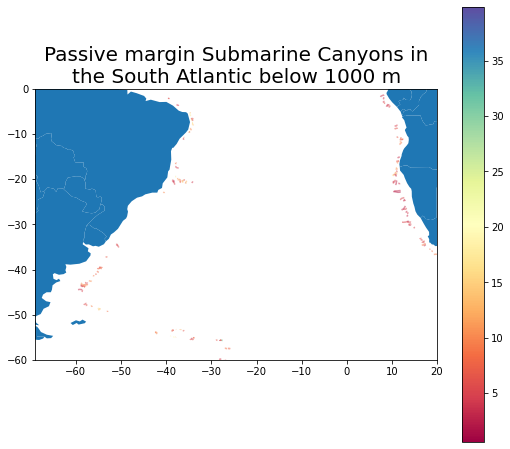

In [13]:
fig, ax = plt.subplots(1, figsize=(9,8))
world.plot(ax=ax) # add world base layer
gdf.plot(column='slope_max',
         categorical=False,
         cmap='Spectral',
         legend= True,
         alpha = 0.5,
         ax=ax)
ax.set_title('Passive margin Submarine Canyons in\nthe South Atlantic below 1000 m',fontsize=20)
ax.set_xlim(-69,20)
ax.set_ylim(-60,0)

We will download the outline of the iAtlantic Study Area: Vitória-Trindade Seamount Chain off Brazil as we will use it for the rest of this tutorial

11. Vitória-Trindade Seamount Chain off Brazil
The Vitória-Trindade Chain of seamounts extends some 1200 km from the eastern continental shelf of Brazil out to the oceanic islands of Trindade and Martin Vaz. These 17 seamounts rise up around 2,500 m from the seafloor, topping out at between 50-110 m below the sea surface, and are home to reef ecosystems and associated fish communities. Seamounts are generally known to be hotspots of biological diversity, but relatively little is known about the marine life around these undersea mountains. iAltantic’s iCorsage expedition, planned for 2021, will undertake extensive geological and biological surveys of these seamounts to better understand their ecology and dynamics.


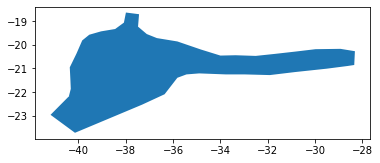

In [14]:
dataset = 'geonode:a__11_2020_12_311'
print(wfs.contents[dataset].title)
print(wfs.contents[dataset].abstract)
response = wfs.getfeature(typename=dataset,
                            outputFormat='application/json')
# write it to a GeoJson file
with open(f'data/study_area.json', 'wb') as outfile:
    outfile.write(response.read())
response.close()
# read it into geopandas
study_area = gpd.read_file('data/study_area.json')
study_area.plot()

### 3.2 Get raster data with WCS

#### <i>Create a WebCoverageService (WCS) object</i>

In [15]:
wcs = WebCoverageService('https://www.geonode.iatlantic.eu/geoserver/ows', version = '1.0.0')

#### <i>Get a list of available coverages</i>

In [16]:
for coverage_name in wcs.contents.keys():
    print(coverage_name)

geonode:Alcyoniina_Habitat_Suitability
geonode:Bathymetry_of_Espirito_Santo_and_Campos_basins_SW_Atlantic1
geonode:MOMARETO_LuckyStrike_50cm_BATHY
geonode:Calcaxonia_Habitat_Suitability
geonode:a__2018_st_All_avg
geonode:Enallopsammia_rostrata_Habitat_Suitability
geonode:Antipatharia_Habitat_Suitability
geonode:Goniocorella_dumosa_Habitat_Suitability
geonode:Holaxonia_Habitat_Suitability
geonode:Lophelia_pertusa_Habitat_Suitability
geonode:Madrepora_oculata_Habitat_Suitability
geonode:seascape_pelagic_habitat_2019_class
geonode:Octocoral_Habitat_Suitability_Consensus
geonode:CE19008_MoCha_SCan_60m_UTM28
geonode:MSM96_WA1_PAP_100m
geonode:Scleractinia_Habitat_Suitability
geonode:Scleraxonia_Habitat_Suitability
geonode:Sessiliflorae_Habitat_Suitability
geonode:Solenosmilia_variabilis_Habitat_Suitability
geonode:Stolonifera_Habitat_Suitability
geonode:Subselliflorae_Habitat_Suitability


In [17]:
dataset = 'geonode:Lophelia_pertusa_Habitat_Suitability'

#### <i>Retrieve a list of available properties of a coverage</i>

In [18]:
for item in dir(wcs.contents[dataset]):
    if "_" not in item:
        print(item)

abstract
axisDescriptions
boundingBox
boundingBoxWGS84
boundingboxes
crsOptions
defaulttimeposition
grid
id
keywords
styles
supportedCRS
supportedFormats
timelimits
timepositions
title


#### <i>Retrieve grid property information</i>

In [19]:
for item in dir(wcs.contents[dataset].grid):
    if "_" not in item:
        print(item + ": " + str(wcs.contents[dataset].grid.__dict__[item]))

axislabels: ['x', 'y']
dimension: 2
highlimits: ['43199', '17289']
lowlimits: ['0', '0']
offsetvectors: [['0.008333333333', '0.0'], ['0.0', '-0.008333333333']]
origin: ['-179.9958333333335', '81.78721769034304']


#### Get geo-bounding boxes and native CRS

In [20]:
wcs.contents[dataset].boundingboxes

[{'nativeSrs': 'EPSG:4326',
  'bbox': (-180.0, -62.29194897056044, 179.99999998559997, 81.79138435700955)}]

#### Retrieve supported formats

In [21]:
wcs.contents[dataset].supportedFormats

['ArcGrid',
 'GeoTIFF',
 'GIF',
 'GeoPackage (mosaic)',
 'ImageMosaic',
 'JPEG',
 'PNG',
 'TIFF']

#### Subset and download raster data using a GetCoverage request

In [22]:
# get parameters for grid
bbox = study_area.bounds.values[0].tolist() # get bbox for iAtlantic study area 
crs = study_area.crs.srs # get crs of the Study Area file

In [23]:
# GetCoverage request
response = wcs.getCoverage(identifier=dataset,
                           format='GeoTIFF',
                           bbox=bbox,
                           crs=crs,
                           resx=0.00833333,resy=0.00833333,
                           interpolation='bicubic')
print(response.geturl())
with open(f'data/{dataset.replace(":","_")}.tif','wb') as outfile:
    outfile.write(response.read())

https://www.geonode.iatlantic.eu/geoserver/wcs?version=1.0.0&request=GetCoverage&service=WCS&Coverage=geonode%3ALophelia_pertusa_Habitat_Suitability&BBox=-41.18060303%2C-23.72198486%2C-28.31951904%2C-18.640625&crs=epsg%3A4326&format=GeoTIFF&resx=0.00833333&resy=0.00833333&interpolation=bicubic


#### Open rasterdata in an xarray object using the rasterio library

In [24]:
import rioxarray
rasterdata = rioxarray.open_rasterio(f'data/{dataset.replace(":","_")}.tif')
rasterdata

<xarray.DataArray (band: 1, y: 610, x: 1543)>
[941230 values with dtype=int16]
Coordinates:
  * band         (band) int32 1
  * y            (y) float64 -18.64 -18.65 -18.66 -18.67 ... -23.7 -23.71 -23.72
  * x            (x) float64 -41.18 -41.17 -41.16 ... -28.34 -28.33 -28.32
    spatial_ref  int32 0
Attributes:
    transform:     (0.008335116001296178, 0.0, -41.18060303, 0.0, -0.00833009...
    _FillValue:    -32768.0
    scale_factor:  1.0
    add_offset:    0.0
    grid_mapping:  spatial_ref

#### Plot a map of the rasterdata overlaid with the study area

Text(0.5, 1.0, 'Lophelia pertusa Habitat suitability in the study area')

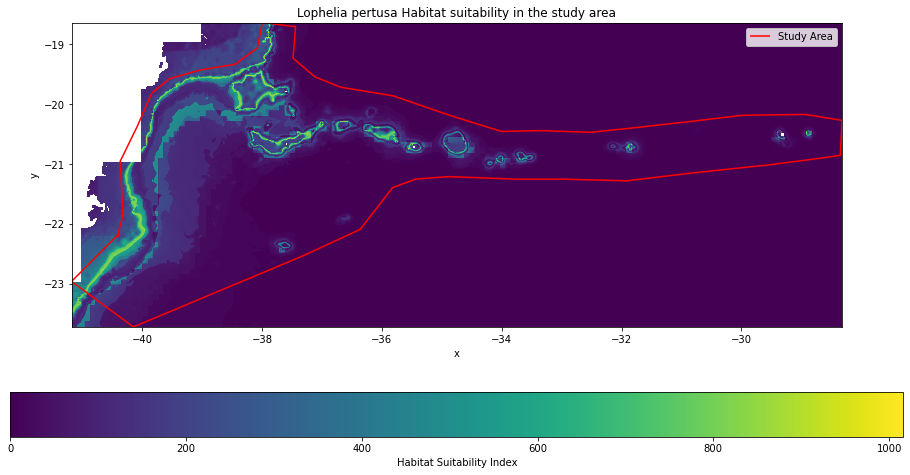

In [25]:
# mask with the nodata value
masked_rasterdata = rasterdata.where(rasterdata != rasterdata._FillValue)
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
masked_rasterdata.plot(ax = ax,cbar_kwargs={'orientation': 'horizontal','label':'Habitat Suitability Index'} ) # plot raster data
study_area.boundary.plot(ax=ax, color=None, edgecolor = 'red', label = 'Study Area') # plot study areas
ax.legend()
ax.set_title('Lophelia pertusa Habitat suitability in the study area')

### [>> Next: Use OGC services from common GIS software](./4_OGC_services_from_common_GIS_software.ipynb)

<hr>

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img style="float: right" alt="Creative Commons Lizenzvertrag" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a>